## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and preprocessing

In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
# First 5 rows of the dataset
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# Infomation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
# Unique values in each column
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [6]:
# Description of the dataset
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [7]:
df.describe(include=['O'])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34854,34854
unique,351,34009,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,3675,11836


## Select Relavent Features

In [8]:
# According to our requirement the columns are selected
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 
'Regionname', 'Propertycount',  
'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 
'Car', 'Landsize', 'BuildingArea', 'Price']

df = df[cols_to_use]

In [9]:
# First few rows of the dataset
df.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [10]:
# Shape of the datset
df.shape

(34857, 15)

In [11]:
# Check for null values
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

## Handle Missing Values

In [12]:
cols_to_fill_zero = ['Propertycount','Distance','Bedroom2','Car','Bathroom']
df[cols_to_fill_zero] =df[cols_to_fill_zero].fillna(0)

In [13]:
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].mean())

In [14]:
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(27244, 15)

## Encode Categorical Features

In [17]:
df = pd.get_dummies(df,drop_first=True)

In [22]:
# First 5 rows of the dataset
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [23]:
X = df.drop('Price', axis=1)
y = df['Price']

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

## Apply Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [31]:
reg.score(X_test,y_test)

0.13853683161493302

In [32]:
reg.score(X_train,y_train)

0.6827792395792723

## Apply Ridge (L2) Regularization

In [33]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [34]:
ridge_reg.score(X_test,y_test)

0.6670848945194958

In [35]:
ridge_reg.score(X_train,y_train)

0.6622376739684328

## Apply Lasso (L1) Regularization

In [36]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [37]:
lasso_reg.score(X_test,y_test)

0.6636111369404488

In [38]:
lasso_reg.score(X_train,y_train)

0.6766985624766824

## Visualizations

In [39]:
# Store r2 scores
lin_train_score = reg.score(X_train, y_train) 
lin_test_score = reg.score(X_test, y_test) 

ridge_train_score = ridge_reg.score(X_train, y_train) 
ridge_test_score = ridge_reg.score(X_test, y_test) 

lasso_train_score = lasso_reg.score(X_train, y_train) 
lasso_test_score = lasso_reg.score(X_test, y_test)

In [44]:
# Create a dataframe for visualization
df_score = pd.DataFrame({
    'Model': ['Linear Regression','Ridge','Lasso'],
    'Train Scores': [lin_train_score,ridge_train_score,lasso_train_score],
    'Test Scores': [lin_test_score,ridge_test_score,lasso_test_score]
})

In [47]:
df_score.head()

,Model,Train Scores,Test Scores
0,Linear Regression,0.682779,0.138537
1,Ridge,0.662238,0.667085
2,Lasso,0.676699,0.663611


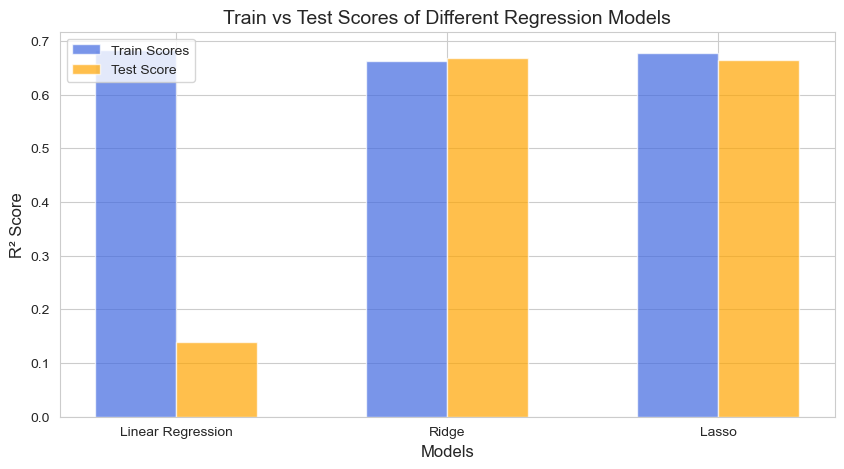

In [50]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))

X_axis = ["Linear Regression", "Ridge", "Lasso"] 
train_scores = [lin_train_score, ridge_train_score, lasso_train_score] 
test_scores = [lin_test_score, ridge_test_score, lasso_test_score] 
bar_width = 0.3
index = range(len(X_axis))

plt.bar(index,train_scores,width=bar_width,label='Train Scores',color='royalblue',alpha=0.7)
plt.bar([i + bar_width for i in index], test_scores, width=bar_width, 
label="Test Score", color='orange', alpha=0.7)

# Labels and title 
plt.xlabel("Models", fontsize=12) 
plt.ylabel("R² Score", fontsize=12) 
plt.title("Train vs Test Scores of Different Regression Models", 
fontsize=14) 
plt.xticks([i + bar_width / 2 for i in index], X_axis) 
plt.legend() 
plt.show()

## Data Preprocessing
### 1.How did you handle missing values in the dataset? 
All the missing values is found using isna() function. To overcome those missing values we have use relavent values in each cases. If it is a value that can take zero, then we have to apply zero instead of null. Here, I have applied mean values for the continous missing features.

### 2.Why did we use get_dummies() for categorical variables?
We use get_dummies() for categorical variables to convert them into a numerical format that machine learning models can understand. get_dummies() achieves this by performing one-hot encoding, which converts each category of a categorical variable into separate binary columns.

## Model Training and Performance
### 1.What are the R² scores for the Linear Regression model on training and 
testing data
Train r2 score = 0.682779	
Test r2 score = 0.138537

### 2.What does the difference between the train and test scores indicate? 
The large difference between the training R² score (0.682779) and the test R² score (0.138537) indicates that the model is likely overfitting.

## Ridge (L2) Regularization
### 1.What are the train and test scores for Ridge Regression?
Train r2 score = 0.662238	
Test r2 score = 0.667085	

### 2.How does Ridge Regression help in reducing overfitting? 
Ridge Regression reduces overfitting by adding a penalty for large coefficients, which prevents the model from becoming too complex and fitting noise in the training data. This helps the model generalize better to new data, reducing variance and improving test performance.

## Lasso (L1) Regularization 
### 1.What are the train and test scores for Lasso Regression? Train r2 score = 0.676699		
Test r2 score =0.663611

### 2.  How does Lasso affect feature selection compared to Ridg
Lasso (L1 regularization) not only reduces overfitting but also performs feature selection by shrinking some coefficients to exactly zero, effectively removing irrelevant features. In contrast, Ridge (L2 regularization) reduces the size of coefficients but doesn’t eliminate them, retaining all features in the model.

## Comparison & Visualization: ### 1. Compare the performances of Linear, Ridge, and Lasso Regression models
#### Linear Regression:
No regularization: It fits the data by minimizing the residuals but is prone to overfitting, especially with high-dimensional data or noisy datasets. It may result in large coefficients for some features, which can cause poor generalization to test data.
#### Ridge Regression:
L2 regularization: It penalizes large coefficients, reducing their size. This helps prevent overfitting by shrinking the coefficients, but it keeps all features in the model. It improves generalization compared to Linear Regression, especially when multicollinearity is present.
#### Lasso Regression:
L1 regularization: It not only shrinks large coefficients like Ridge but also performs feature selection by shrinking some coefficients to zero. This can be advantageous when there are many irrelevant or redundant features, as Lasso simplifies the model and improves interpretability.

### 2.• Based on the visualizations, which model performed best anwhy?
Based on the near-equal train and test scores, Ridge Regression performed best as it achieved the highest generalization while controlling overfitting effectively.

## Regularization Impact: ### 1. What happens when you increase the alpha value in Ridge and Lasso
Regression
Higher alpha in Ridge: Increases shrinkage of coefficients, reducing overfitting.
Higher alpha in Lasso: Eliminates more features, performing stronger feature selection.

### 2.If you had to choose one model for this dataset, which one would it be and why?w
Ridge Regression: Best choice due to strong generalization and no overfitting.

hy? y?e??